In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import *
import pandas as pd
import matplotlib

In [3]:
def get_stats(root_uuid, prefix='tst', model_name='rvce'):
    table = pd.read_csv(f'outputs/{root_uuid}/{prefix}_{model_name}_output.csv')
    rvce = table['rvce: n_counts'][:-1].to_numpy().astype(float)
    stats = {}
    stats['rvce'] = rvce
    stats['<10%'] = np.mean(rvce < 0.1)
    stats['<5%'] = np.mean(rvce < 0.05)
    stats['Q1'] = np.quantile(rvce, 0.25)
    stats['mean'] = np.mean(rvce)
    stats['std'] = np.std(rvce)
    stats['median'] = np.median(rvce)
    stats['Q3'] = np.quantile(rvce, 0.75)
    return stats


def plot(root_uuids, figsize=(7, 5), font_size=None, notch=True, rotation=45):
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    if font_size != None:
        matplotlib.rcParams['font.size'] = font_size
    
    rvces = []
    names = []

    for root_uuid, prefix, model_name, name in root_uuids:
        stats = get_stats(root_uuid, prefix, model_name)
        rvce = stats['rvce']
        rvces.append(rvce)
        names.append(name)

    np.random.seed(41)
    plt.figure(figsize=figsize)
    for i, points in enumerate(rvces):
        xs = np.random.normal(i + 1, 0.04, len(points))
        plt.scatter(xs, points, alpha=0.3)

    plt.ylabel('RVCE')
    # plt.title('RVCE of different models')
    plt.grid()

    plt.gca().set_xticklabels(names, rotation=rotation)

    meanprops = dict(marker='x', markeredgecolor='black', markerfacecolor='firebrick')

    plt.boxplot(rvces, showmeans=True, showfliers=False, notch=notch, meanprops=meanprops, medianprops={'c': 'k'});
    plt.tight_layout()

In [4]:
# matplotlib.rcParams['font.size']

In [5]:
# use default
# matplotlib.rcParams.update({'font.size': 15})

# use default
plt.style.use(['default'])

In [6]:
# Window length
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Baseline'),
]
plot(root_uuids, font_size=15, rotation=0)
plt.savefig('plots/boxplots/baseline_boxplot.pdf')

In [8]:
# Window length
root_uuids = [
    ('038_RX100_window_4', 'tst', 'rvce', '4s'),
    # ('038_RX100_window_4', 'tst_doubled', 'rvce', '4s doubled'),
    ('038_RX100_window_5', 'tst', 'rvce', '5s'),
    # ('038_RX100_window_5', 'tst_doubled', 'rvce', '5s doubled'),
    ('038_RX100_window_6', 'tst', 'rvce', '6s'),
    # ('038_RX100_window_6', 'tst_doubled', 'rvce', '6s doubled'),
    ('038_RX100_window_7', 'tst', 'rvce', '7s'),
    # ('038_RX100_window_7', 'tst_doubled', 'rvce', '7s doubled'),
    ('038_RX100_window_8', 'tst', 'rvce', '8s'),
    # ('038_RX100_window_8', 'tst_doubled', 'rvce', '8s doubled'),
    ('038_RX100_window_9', 'tst', 'rvce', '9s'),
    # ('038_RX100_window_9', 'tst_doubled', 'rvce', '9s doubled'),
    ('038_RX100_window_10', 'tst', 'rvce', '10s'),
    # ('038_RX100_window_10', 'tst_doubled', 'rvce', '10s doubled'),
]
plot(root_uuids, font_size=15, rotation=0)
plt.savefig('plots/boxplots/window_length_boxplot.pdf')

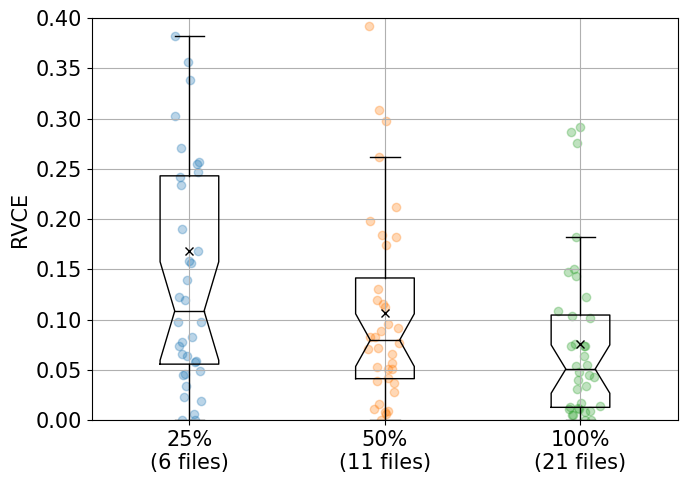

In [12]:
# Dataset size
root_uuids = [
    ('010_eyedea_RX100_quarter', 'tst', 'rvce', '25%\n(6 files)'),
    ('010_eyedea_RX100_half', 'tst', 'rvce', '50%\n(11 files)'),
    ('010_eyedea_RX100_1', 'tst', 'rvce', '100%\n(21 files)'),
]
plot(root_uuids, font_size=15, rotation=0)
plt.ylim(0, 0.4)
plt.savefig('plots/boxplots/dataset_size_boxplot.pdf')
plt.show()

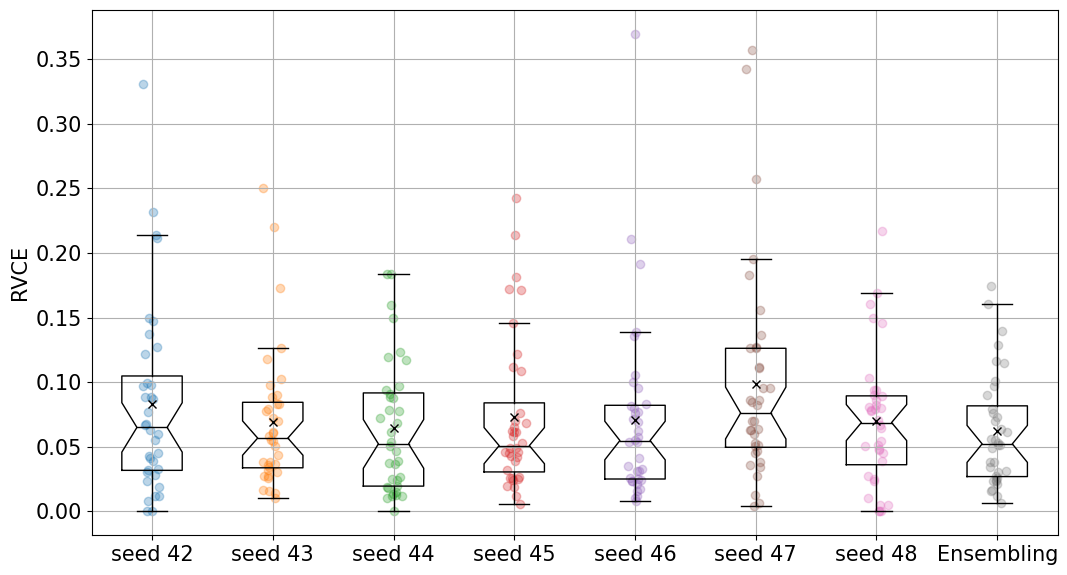

In [13]:
# Shuffled training dataset
root_uuids = [
    ('035_RX100_resized_128_audio_image_augmentation', 'tst', 'rvce', 'seed 42'),
    ('035_RX100_43_resized_128_audio_image_augmentation_bs_256', 'tst', 'rvce', 'seed 43'),
    ('035_RX100_44_resized_128_audio_image_augmentation_bs_256', 'tst', 'rvce', 'seed 44'),
    ('035_RX100_45_resized_128_audio_image_augmentation_bs_256', 'tst', 'rvce', 'seed 45'),
    ('035_RX100_46_resized_128_audio_image_augmentation_bs_256', 'tst', 'rvce', 'seed 46'),
    ('035_RX100_47_resized_128_audio_image_augmentation_bs_256', 'tst', 'rvce', 'seed 47'),
    ('035_RX100_48_resized_128_audio_image_augmentation_bs_256', 'tst', 'rvce', 'seed 48'),
    
    ('000_ensembling_shuffled_training_dataset', 'tst', 'rvce', 'Ensembling'),
    # ('000_ensembling_shuffled_training_dataset_43_45_46', 'tst', 'rvce', 'Ensembling'),

    # ('000_ensembling', 'tst_doubled', 'rvce', 'Ensembling\nDoubled'),
    # ('000_manual', 'tst', 'rvce', 'MMR RX100'),
    # ('000_manual', 'tst_iphone', 'rvce', 'MMR iPhone'),
    # ('000_manual', 'tst_Mobius', 'rvce', 'MMR Mobius'),
]
plot(root_uuids, figsize=(11, 6), font_size=15, rotation=0)
plt.savefig('plots/boxplots/ensembling_boxplot.pdf')
plt.show()

(0.0, 0.26)

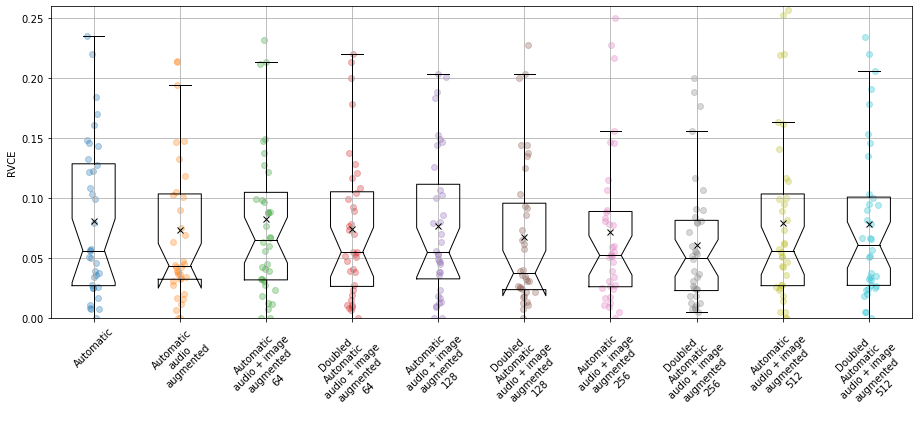

In [15]:
# Manual annotations + audio augmentations
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Automatic'),
    ('034_RX100_resized_128_augmented', 'tst', 'rvce', 'Automatic\naudio\naugmented'),
    
    ('035_RX100_resized_128_audio_image_augmentation', 'tst', 'rvce', 'Automatic\naudio + image\naugmented\n64'),
    ('035_RX100_resized_128_audio_image_augmentation', 'tst_doubled', 'rvce', 'Doubled\nAutomatic\naudio + image\naugmented\n64'),
    # ('035_RX100_resized_128_audio_image_augmentation', 'tst_doubled_manual', 'rvce', 'Doubled\nManual\naudio + image\naugmented\n64'),
    
    ('035_RX100_resized_128_audio_image_augmentation_bs_128', 'tst', 'rvce', 'Automatic\naudio + image\naugmented\n128'),
    ('035_RX100_resized_128_audio_image_augmentation_bs_128', 'tst_doubled', 'rvce', 'Doubled\nAutomatic\naudio + image\naugmented\n128'),
    # ('035_RX100_resized_128_audio_image_augmentation_bs_128', 'tst_doubled_manual', 'rvce', 'Doubled\nManual\naudio + image\naugmented\n128'),
    
    ('035_RX100_resized_128_audio_image_augmentation_bs_256', 'tst', 'rvce', 'Automatic\naudio + image\naugmented\n256'),
    ('035_RX100_resized_128_audio_image_augmentation_bs_256', 'tst_doubled', 'rvce', 'Doubled\nAutomatic\naudio + image\naugmented\n256'),
    # ('035_RX100_resized_128_audio_image_augmentation_bs_256', 'tst_doubled_manual', 'rvce', 'Doubled\nManual\naudio + image\naugmented\n256'),

    ('035_RX100_resized_128_audio_image_augmentation_bs_512', 'tst', 'rvce', 'Automatic\naudio + image\naugmented\n512'),
    ('035_RX100_resized_128_audio_image_augmentation_bs_512', 'tst_doubled', 'rvce', 'Doubled\nAutomatic\naudio + image\naugmented\n512'),
    # ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
    
    # ('035_RX100_resized_128_audio_image_augmentation', 'tst_manual', 'rvce', 'Manual\naudio + image\naugmented\n64'),
    # ('035_RX100_resized_128_audio_image_augmentation_bs_128', 'tst_manual', 'rvce', 'Manual\naudio + image\naugmented\n128'),
    # ('035_RX100_resized_128_audio_image_augmentation_bs_256', 'tst_manual', 'rvce', 'Manual\naudio + image\naugmented\n256'),
    
    # ('033_RX100_resized_128_manual_counts', 'tst', 'rvce', 'Manual'),
    # ('034_RX100_resized_128_augmented_manual_counts', 'tst', 'rvce', 'Manual\naugmented'),
]
plot(root_uuids, figsize=(13, 6))
plt.ylim(0, 0.26)

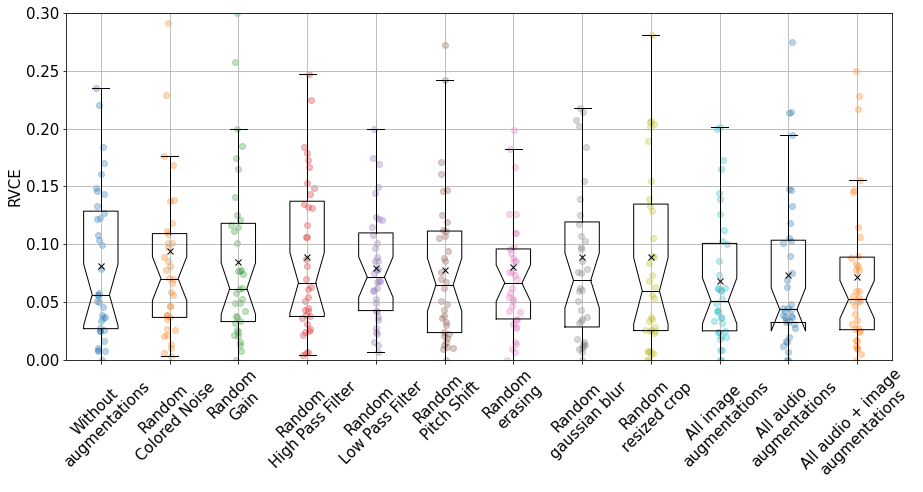

In [41]:
# All augmentations
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Without\naugmentations'),
    ('032_RX100_resized_128_random_colored_noise', 'tst', 'rvce', 'Random\nColored Noise'),
    ('032_RX100_resized_128_random_gain', 'tst', 'rvce', 'Random\nGain'),
    ('032_RX100_resized_128_random_high_pass_filter', 'tst', 'rvce', 'Random\nHigh Pass Filter'),
    ('032_RX100_resized_128_random_low_pass_filter', 'tst', 'rvce', 'Random\nLow Pass Filter'),
    ('032_RX100_resized_128_random_pitch_shift', 'tst', 'rvce', 'Random\nPitch Shift'),

    ('027_RX100_resized_128_random_erasing', 'tst', 'rvce', 'Random\nerasing'),
    ('027_RX100_resized_128_random_gaussian_blur', 'tst', 'rvce', 'Random\ngaussian blur'),
    ('027_RX100_resized_128_random_resized_crop', 'tst', 'rvce', 'Random\nresized crop'),
    ('027_RX100_resized_128_augmentations_all_1', 'tst', 'rvce', 'All image\naugmentations'),
    ('032_RX100_resized_128_audio_augmentations', 'tst', 'rvce', 'All audio\naugmentations'),

    ('035_RX100_resized_128_audio_image_augmentation_bs_256', 'tst', 'rvce', 'All audio + image\naugmentations'),

]
plot(root_uuids, figsize=(13, 7), font_size=15)
plt.ylim(0, 0.3)
plt.savefig('plots/boxplots/audio_image_augmentations_boxplot.pdf')

(0.0, 0.3)

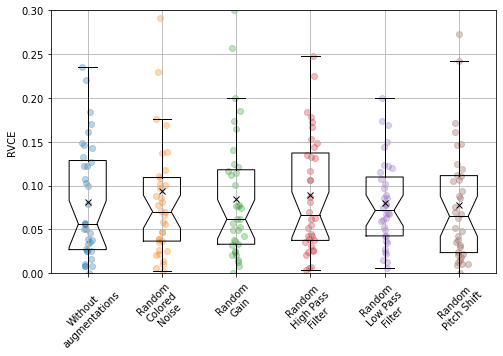

In [8]:
# Audio augmentations
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Without\naugmentations'),
    ('032_RX100_resized_128_random_colored_noise', 'tst', 'rvce', 'Random\nColored\nNoise'),
    ('032_RX100_resized_128_random_gain', 'tst', 'rvce', 'Random\nGain'),
    ('032_RX100_resized_128_random_high_pass_filter', 'tst', 'rvce', 'Random\nHigh Pass\nFilter'),
    ('032_RX100_resized_128_random_low_pass_filter', 'tst', 'rvce', 'Random\nLow Pass\nFilter'),
    ('032_RX100_resized_128_random_pitch_shift', 'tst', 'rvce', 'Random\nPitch Shift'),
]
plot(root_uuids)
plt.ylim(0, 0.3)

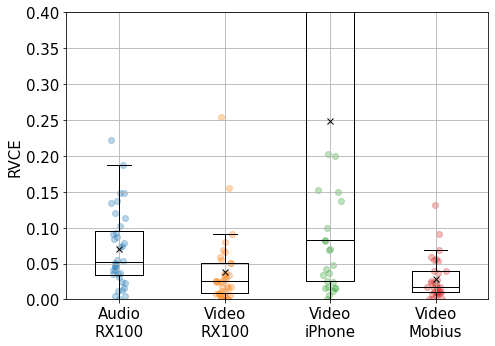

In [82]:
# Manual annotations
root_uuids = [
    ('035_RX100_resized_128_audio_image_augmentation_bs_256', 'tst_doubled_manual', 'rvce', 'Audio\nRX100'),
    ('000_manual', 'tst', 'rvce', 'Video\nRX100'),
    ('000_manual', 'tst_iphone', 'rvce', 'Video\niPhone'),
    ('000_manual', 'tst_Mobius', 'rvce', 'Video\nMobius'),
]
plot(root_uuids, notch=False, font_size=15, rotation=0)
# plt.yscale('log')
plt.ylim(0, 0.4)
plt.savefig('plots/boxplots/manual_annotations_boxplot.pdf')

In [ ]:
# Bigger dataset, Augmentations
root_uuids = [
    ('029_aligned_resized_128', 'tst', 'rvce', 'Without\naugmentation'),
    ('029_aligned_resized_128_augmentations_all', 'tst', 'rvce', 'All\ncombined\nseed 42'),
    ('029_aligned_resized_128_augmentations_all_seed_43', 'tst', 'rvce', 'All\ncombined\nseed 43'),
    ('029_aligned_resized_128_augmentations_all_seed_44', 'tst', 'rvce', 'All\ncombined\nseed 44'),
    ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids)
plt.ylim(0, 0.3)
plt.savefig('plots/boxplots/big_dataset_augmentations_boxplot.pdf')

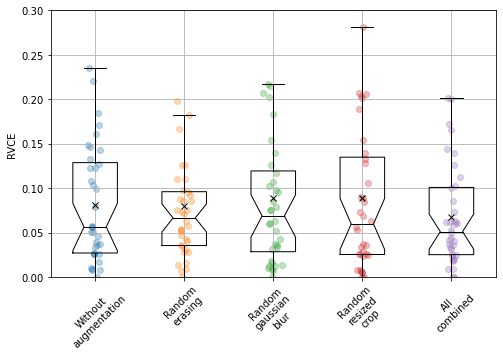

In [28]:
# Augmentations
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Without\naugmentation'),
    
    ('027_RX100_resized_128_random_erasing', 'tst', 'rvce', 'Random\nerasing'),
    # ('027_RX100_resized_128_random_erasing_1', 'tst', 'rvce', 'Random\nerasing'),

    ('027_RX100_resized_128_random_gaussian_blur', 'tst', 'rvce', 'Random\ngaussian\nblur'),
    # ('027_RX100_resized_128_random_gaussian_blur_1', 'tst', 'rvce', 'Random\ngaussian\nblur'),
    
    ('027_RX100_resized_128_random_resized_crop', 'tst', 'rvce', 'Random\nresized\ncrop'),
    # ('027_RX100_resized_128_random_resized_crop_1', 'tst', 'rvce', 'Random\nresized\ncrop'),

    # ('027_RX100_resized_128_augmentations_all', 'tst', 'rvce', 'All\ncombined'),
    ('027_RX100_resized_128_augmentations_all_1', 'tst', 'rvce', 'All\ncombined'),
    
    # ('027_RX100_resized_128_augmentations_all', 'tst_doubled', 'rvce', 'All\ncombined'),
    # ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids)
plt.ylim(0, 0.3)
plt.savefig('plots/boxplots/augmentations_boxplot.pdf')

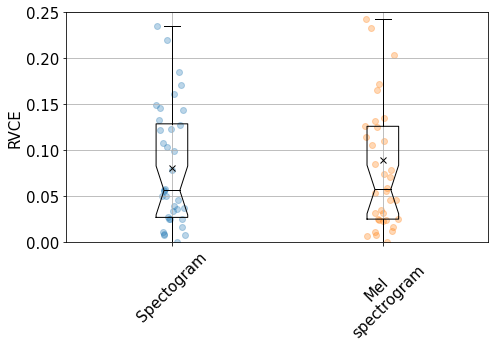

In [28]:
# Devices
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Spectogram'),
    ('026_RX100_resized_128_mel', 'tst', 'rvce', 'Mel\nspectrogram'),
    # ('026_RX100_resized_mfcc', 'tst', 'rvce', 'MFCC'),
]
plot(root_uuids, font_size=15)
plt.ylim(0, 0.25)
plt.savefig('plots/boxplots/feature_extractor_boxplot.pdf')

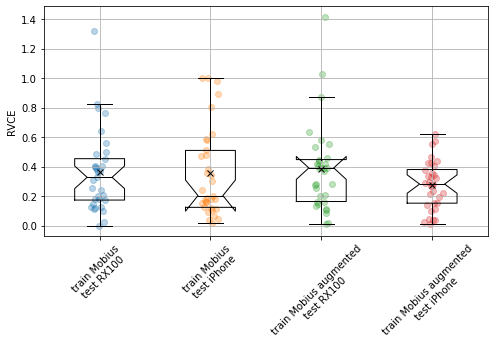

In [31]:
# Cross-device 
root_uuids = [
    # ('024_RX100_smaller_resized_128', 'tst', 'rvce', 'train RX100\ntest RX100'),
    # ('000_cross_device', 'train_RX100_test_Mobius', 'rvce', 'train RX100\ntest Mobius'),
    # ('000_cross_device', 'train_RX100_test_iphone', 'rvce', 'train RX100\ntest iPhone'),
    # ('000_cross_device', 'train_RX100_augmented_test_Mobius', 'rvce', 'train augmented RX100\ntest Mobius'),
    # ('000_cross_device', 'train_RX100_augmented_test_iphone', 'rvce', 'train augmented RX100\ntest iPhone'),

    ('000_cross_device', 'train_Mobius_test_RX100', 'rvce', 'train Mobius\ntest RX100'),
    ('000_cross_device', 'train_Mobius_test_iphone', 'rvce', 'train Mobius\ntest iPhone'),
    ('000_cross_device', 'train_Mobius_augmented_test_RX100', 'rvce', 'train Mobius augmented\ntest RX100'),
    ('000_cross_device', 'train_Mobius_augmented_test_iphone', 'rvce', 'train Mobius augmented\ntest iPhone'),

    
    # ('000_cross_device', 'train_iphone_test_Mobius', 'rvce', 'train iPhone\ntest Mobius'),
    # ('000_cross_device', 'train_iphone_test_RX100', 'rvce', 'train iPhone\ntest RX100'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/cross_device_augmented_boxplot.pdf')

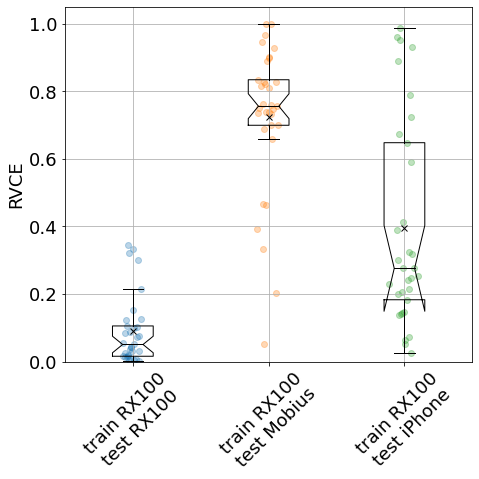

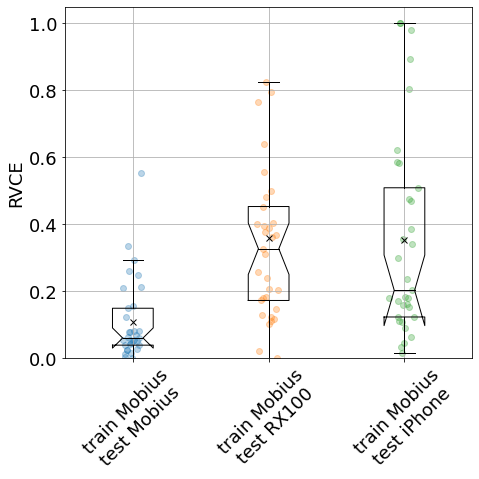

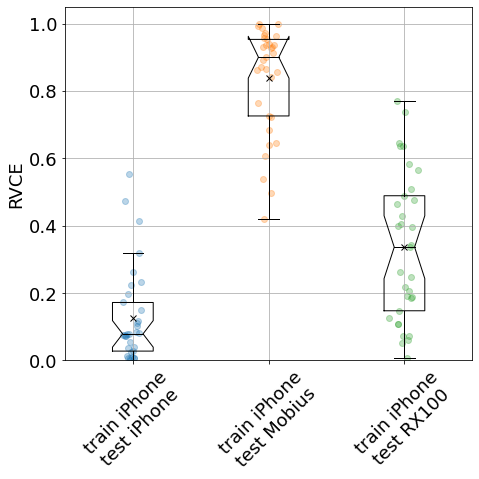

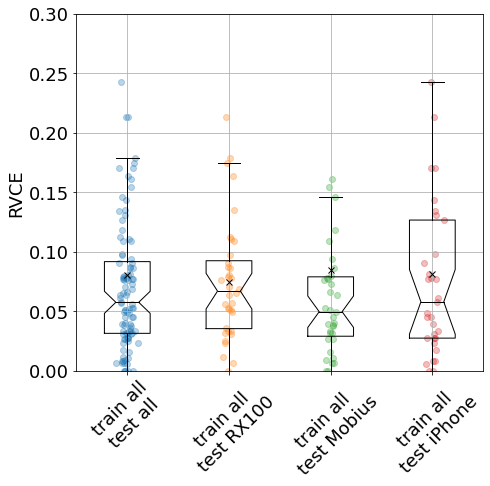

In [23]:
font_size = 18

# Cross-device
root_uuids = [
    ('024_RX100_smaller_resized_128', 'tst', 'rvce', 'train RX100\ntest RX100'),
    ('000_cross_device', 'train_RX100_test_Mobius', 'rvce', 'train RX100\ntest Mobius'),
    ('000_cross_device', 'train_RX100_test_iphone', 'rvce', 'train RX100\ntest iPhone'),
]
plot(root_uuids, figsize=(7, 7), font_size=font_size)
plt.ylim(0, 1.05)
plt.savefig('plots/boxplots/cross_device_RX100_boxplot.pdf')

root_uuids = [
    ('024_Mobius_aligned_smaller_resized_128', 'tst', 'rvce', 'train Mobius\ntest Mobius'),
    ('000_cross_device', 'train_Mobius_test_RX100', 'rvce', 'train Mobius\ntest RX100'),
    ('000_cross_device', 'train_Mobius_test_iphone', 'rvce', 'train Mobius\ntest iPhone'),
]
plot(root_uuids, figsize=(7, 7), font_size=font_size)
plt.ylim(0, 1.05)
plt.savefig('plots/boxplots/cross_device_Mobius_boxplot.pdf')

root_uuids = [
    ('024_iphone_aligned_smaller_resized_128', 'tst', 'rvce', 'train iPhone\ntest iPhone'),
    ('000_cross_device', 'train_iphone_test_Mobius', 'rvce', 'train iPhone\ntest Mobius'),
    ('000_cross_device', 'train_iphone_test_RX100', 'rvce', 'train iPhone\ntest RX100'),
]
plot(root_uuids, figsize=(7, 7), font_size=font_size)
plt.ylim(0, 1.05)
plt.savefig('plots/boxplots/cross_device_iphone_boxplot.pdf')

root_uuids = [
    ('029_aligned_resized_128', 'tst', 'rvce', 'train all\ntest all'),
    ('000_cross_device', 'train_all_test_RX100', 'rvce', 'train all\ntest RX100'),
    ('000_cross_device', 'train_all_test_Mobius', 'rvce', 'train all\ntest Mobius'),
    ('000_cross_device', 'train_all_test_iphone', 'rvce', 'train all\ntest iPhone'),
]
plot(root_uuids, figsize=(7, 7), font_size=font_size)
plt.ylim(0, 0.3)
plt.savefig('plots/boxplots/cross_device_all_boxplot.pdf')

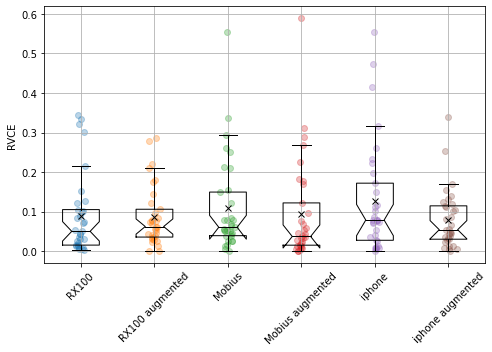

In [28]:
# Devices with augmentations
root_uuids = [
    ('024_RX100_smaller_resized_128', 'tst', 'rvce', 'RX100'),
    ('024_RX100_smaller_resized_128_augmentations', 'tst', 'rvce', 'RX100 augmented'),

    ('024_Mobius_aligned_smaller_resized_128', 'tst', 'rvce', 'Mobius'),
    ('024_Mobius_aligned_smaller_resized_128_augmentations', 'tst', 'rvce', 'Mobius augmented'),
    
    ('024_iphone_aligned_smaller_resized_128', 'tst', 'rvce', 'iphone'),
    ('024_iphone_aligned_smaller_resized_128_augmentations', 'tst', 'rvce', 'iphone augmented'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/devices_augmentations_boxplot.pdf')

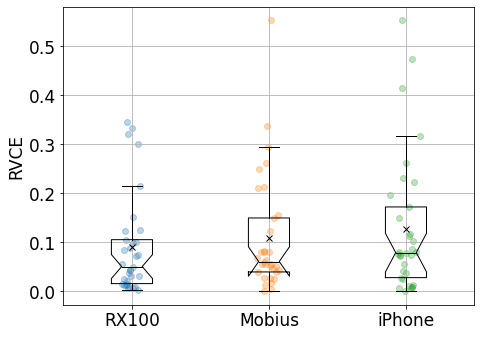

In [84]:
# Devices
root_uuids = [
    ('024_RX100_smaller_resized_128', 'tst', 'rvce', 'RX100'),
    ('024_Mobius_aligned_smaller_resized_128', 'tst', 'rvce', 'Mobius'),
    ('024_iphone_aligned_smaller_resized_128', 'tst', 'rvce', 'iPhone'),
]
plot(root_uuids, font_size=17, rotation=0)
plt.savefig('plots/boxplots/devices_boxplot.pdf')

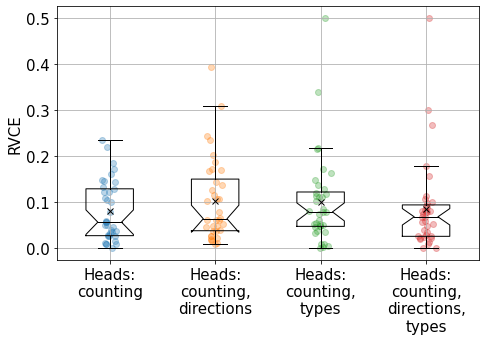

In [71]:
# Multiple heads
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Heads:\ncounting'),

    ('023_RX100_resized_128_directions', 'tst', 'rvce', 'Heads:\ncounting,\ndirections'),
    # ('023_RX100_resized_128_directions', 'tst_structured', 'rvce', 'Heads:\ncounting,\ndirections.\nStructured'),
    
    ('023_RX100_resized_128_types', 'tst', 'rvce', 'Heads:\ncounting,\ntypes'),
    # ('023_RX100_resized_128_types', 'tst_structured', 'rvce', 'Heads:\ncounting,\ntypes.\nStructured'),
    
    ('023_RX100_resized_128_direction_types', 'tst', 'rvce', 'Heads:\ncounting,\ndirections,\ntypes'),
    # ('023_RX100_resized_128_direction_types', 'tst_structured', 'rvce', 'Heads:\ncounting,\ndirections,\ntypes.\nStructured'),
]
plot(root_uuids, font_size=15, rotation=0)
plt.savefig('plots/boxplots/multiple_heads_boxplot.pdf')

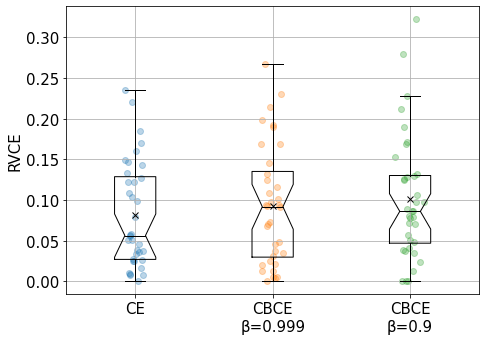

In [64]:
# ClassBalancedCrossEntropy
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'CE'),
    ('021_RX100_resized_128_CBCE_1', 'tst', 'rvce', 'CBCE\nβ=0.999'),
    ('021_RX100_resized_128_CBCE_beta09', 'tst', 'rvce', 'CBCE\nβ=0.9'),
    # ('021_RX100_resized_128_CBCE_beta0999', 'tst', 'rvce', 'Class-Balanced\nCross-Entropy\nβ=0.999'),
    # ('021_RX100_resized_128_CBCE_beta09_1', 'tst', 'rvce', 'Class-Balanced\nCross-Entropy\nβ=0.9'),
]
plot(root_uuids, font_size=15, rotation=0)
plt.savefig('plots/boxplots/loss_boxplot.pdf')

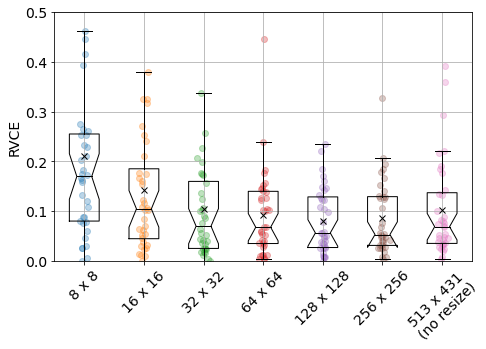

In [57]:
# resize
root_uuids = [
    ('020_RX100_resized_8', 'tst', 'rvce', '8 x 8'),
    ('020_RX100_resized_16', 'tst', 'rvce', '16 x 16'),
    ('020_RX100_resized_32', 'tst', 'rvce', '32 x 32'),
    ('020_RX100_resized_64', 'tst', 'rvce', '64 x 64'),
    ('020_RX100_resized_128', 'tst', 'rvce', '128 x 128'),
    ('020_RX100_resized_256', 'tst', 'rvce', '256 x 256'),
    ('010_eyedea_RX100_3', 'tst', 'rvce', '513 x 431\n(no resize)'),
]
plot(root_uuids, font_size=14,)
plt.ylim(0, 0.5)
plt.savefig('plots/boxplots/resize_boxplot.pdf')

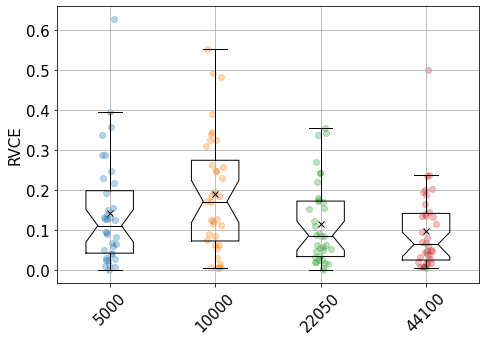

In [44]:
# sampling rate with resize
root_uuids = [
    ('031_RX100_resized_128_sr_5000', 'tst', 'rvce', '5000'), # sr 5000
    ('031_RX100_resized_128_sr_10000', 'tst', 'rvce', '10000'), # sr 10000
    ('031_RX100_resized_128_sr_22050', 'tst', 'rvce', '22050'), # sr 22050
    ('031_RX100_resized_128_sr_44100', 'tst', 'rvce', '44100'), # sr 44100
]
plot(root_uuids)
plt.savefig('plots/boxplots/sampling_rate_resize_boxplot.pdf')

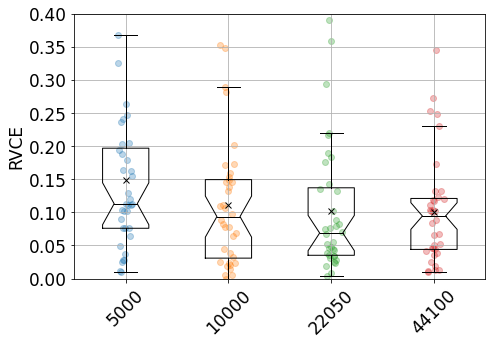

In [43]:
# sampling rate
root_uuids = [
    ('017_eyedea_RX100_sr_5000', 'tst', 'rvce', '5000'), # sr 5000
    ('017_eyedea_RX100_sr_10000', 'tst', 'rvce', '10000'), # sr 10000
    ('010_eyedea_RX100_3', 'tst', 'rvce', '22050'), # sr 22050
    ('017_eyedea_RX100_sr_44100', 'tst', 'rvce', '44100'), # sr 44100
]
plot(root_uuids, font_size=17)
plt.ylim(0, 0.4)
plt.savefig('plots/boxplots/sampling_rate_boxplot.pdf')

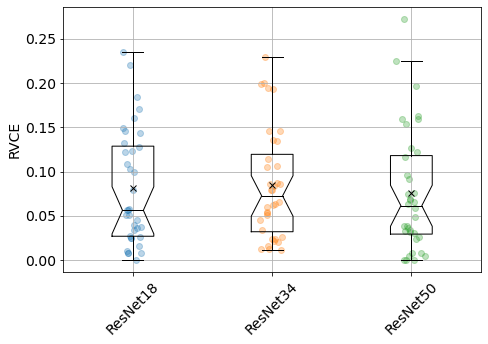

In [49]:
# architecture
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'ResNet18'),
    ('022_RX100_resized_128_ResNet34', 'tst', 'rvce', 'ResNet34'),
    ('022_RX100_resized_128_ResNet50', 'tst', 'rvce', 'ResNet50'),
    # ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids, font_size=14)
plt.savefig('plots/boxplots/architecture_boxplot.pdf')

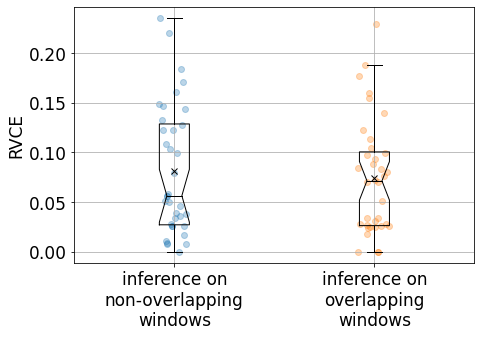

In [55]:
# doubled inference
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'inference on\nnon-overlapping\nwindows'),
    ('020_RX100_resized_128', 'tst_doubled', 'rvce', 'inference on\noverlapping\nwindows'),
]
plot(root_uuids, font_size=17, rotation=0)
plt.savefig('plots/boxplots/doubled_inference_boxplot.pdf')

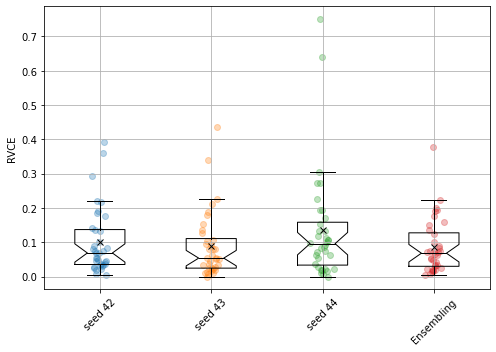

In [25]:
# seed
root_uuids = [
    ('010_eyedea_RX100_3', 'tst', 'rvce', 'seed 42'),
    ('018_eyedea_RX100_seed_43', 'tst', 'rvce', 'seed 43'),
    ('018_eyedea_RX100_seed_44', 'tst', 'rvce', 'seed 44'),
    ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/seed_boxplot.pdf')

(0.0, 0.45)

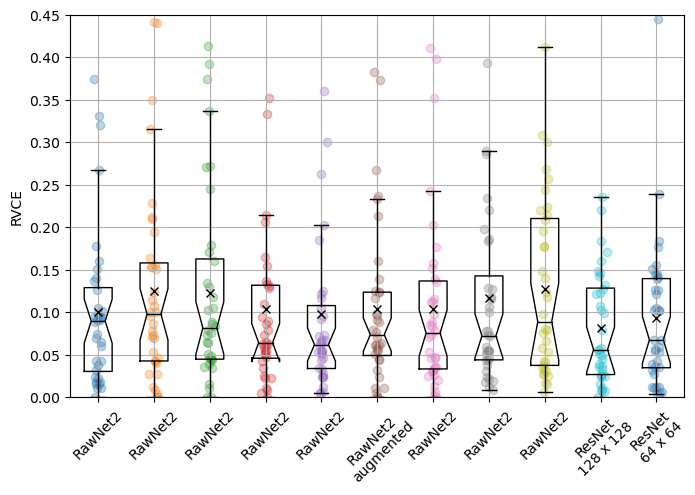

In [90]:
# seed
root_uuids = [
    ('016_RX100_RawNet2_1', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_2', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_3', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_4', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_5', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_5_augmentations', 'tst', 'rvce', 'RawNet2\naugmented'),
    ('016_RX100_RawNet2_6', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_7', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_8', 'tst', 'rvce', 'RawNet2'),
    ('020_RX100_resized_128', 'tst', 'rvce', 'ResNet\n128 x 128'),
    ('020_RX100_resized_64', 'tst', 'rvce', 'ResNet\n64 x 64'),

]
plot(root_uuids)
plt.ylim(0, 0.45)
# plt.savefig('plots/boxplots/raw_net2_boxplot.pdf')